### 1. Importing Visualization libraries and dataset
### 2. Define Variables for comparisons/correlations
### 3. Correlations
### 4. Scatterplots
### 5. Pair Plots
### 6. Categorical Plots
### 7. Revisit the questions previously generated
### 8. Define any hypothesis 

    1. Importing Visualization libraries and dataset
    (Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check version of matplotlib
matplotlib.__version__

'3.7.0'

In [2]:
#Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
#Define shortcut to path
path = r'C:\Users\dodge\24-08-27 Transportation'

In [4]:
#Import dataset
df_cars = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_clean.csv'), index_col=0)

In [9]:
df_cars.head()

,Month_ending,Year,County,State,Primary_use,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric
0,April,2017,Pinal,AZ,Passenger,2,0,2,254,256,0.78
1,April,2017,Island,WA,Passenger,108,128,236,59768,60004,0.39
2,April,2017,Clark,WA,Truck,0,0,0,77561,77561,0.00
3,April,2017,Allegheny,PA,Passenger,1,0,1,93,94,1.06
4,April,2017,Shelby,TN,Passenger,0,1,1,109,110,0.91


    2. Define variables for comparison by creating a subset
    (Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.)

In [12]:
#Select Year, Battery_BEVs, Hybrid_(PHEVs), and Non-Electric Total for correlations
df_corr_sub=df_cars[['Year', 'Battery_BEVs', 'Hybrid_(PHEVs)', 'Non-Electric_Total']]

In [13]:
#Review the output
df_corr_sub

,Year,Battery_BEVs,Hybrid_(PHEVs),Non-Electric_Total
0,2017,2,0,254
1,2017,108,128,59768
2,2017,0,0,77561
3,2017,1,0,93
4,2017,0,1,109
...,...,...,...,...
17960,2022,1,0,20
17961,2022,1,0,86
17962,2022,1,0,24
17963,2022,339,178,46951


    3. Correlations
    (Create a correlation matrix heatmap (colored).)

In [14]:
#Look at correlation matrix with pandas
df_corr_sub.corr()

,Year,Battery_BEVs,Hybrid_(PHEVs),Non-Electric_Total
Year,1.000000,0.047013,0.037244,-0.019059
Battery_BEVs,0.047013,1.000000,0.981237,0.804189
Hybrid_(PHEVs),0.037244,0.981237,1.000000,0.889029
Non-Electric_Total,-0.019059,0.804189,0.889029,1.000000


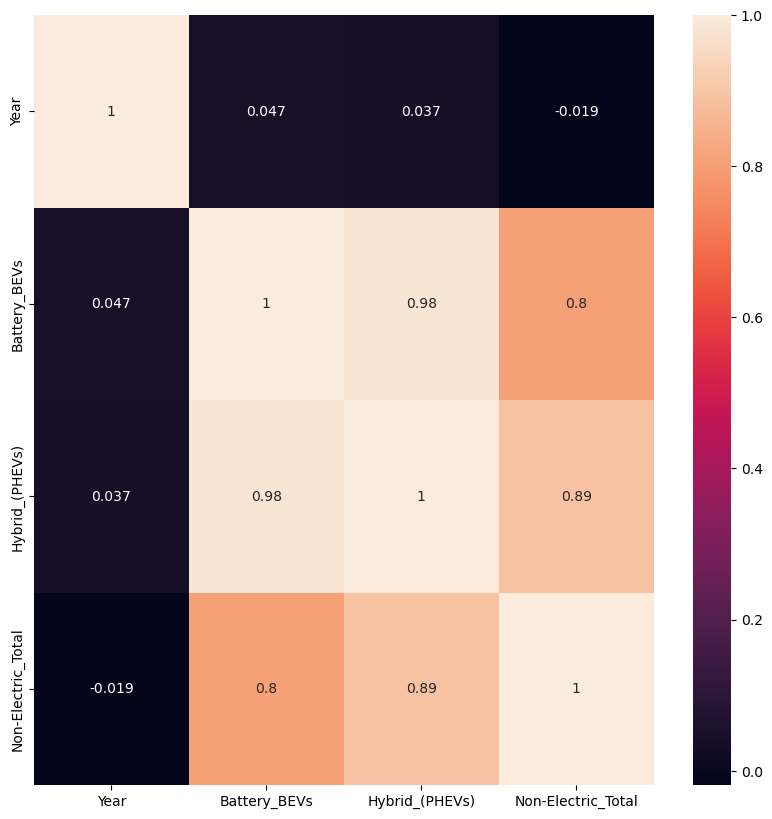

In [16]:
#Create subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Create correlation heatmap in seaborn by applying a heatmap onto the subplot
corr = sns.heatmap(df_corr_sub.corr(), annot = True, ax=ax)

This dataset is deceiving for correlations amongst the variables.  There should not be any correlation to whether a vehicle count is electric vs non-electric; and yet a strong indicator came back between the electric vehicle sub-categories to the non-electric category.  I was more interested to see if any correlation showed up between the year and the car type; unfortunately the correlations are extremely weak with a slightly negative correlation between the year and non-electric vehicles and an extremely weak correlation between the year and electric vehicles.  This could indicate (weakly) that as the years go by, more electric vehicles are being registered in Washington State.

In [19]:
#Export visualization
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Heatmap.png'))

    4. Scatterplot(s)
    (Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.)

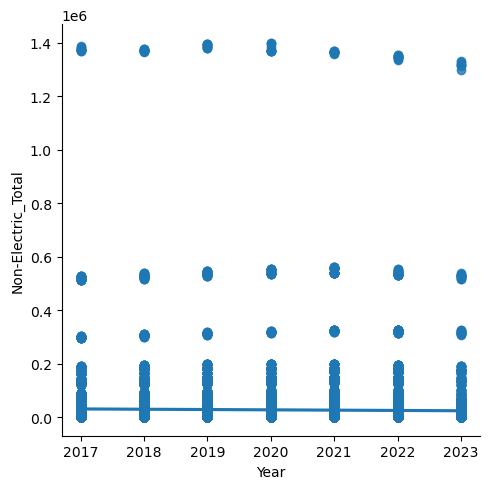

In [17]:
#Create scatterplot for year and non-electric vehicles
sns.lmplot(x = 'Year', y = 'Non-Electric_Total', data = df_cars)

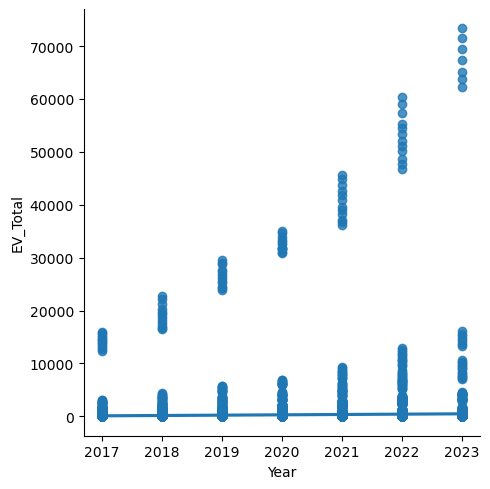

In [18]:
#Create scatterplot between year and electric vehicles
sns.lmplot(x = 'Year', y = 'EV_Total', data = df_cars)

Well, the second scatterplot was much more interesting to me than the first one however, the overall relationship is essentially neutral as seen with the fairly straight trend line with no degree of variability.

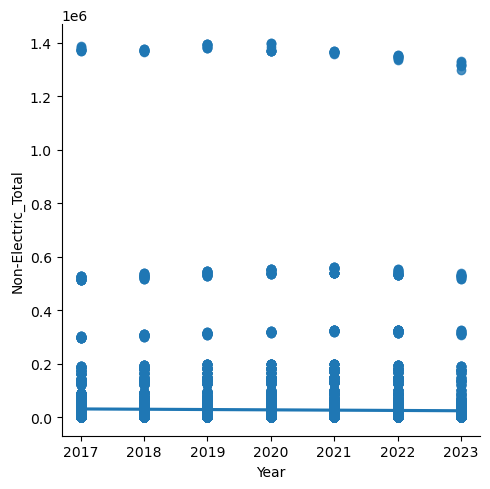

In [20]:
#Name visualizations so they can be saved
Scatter_Non_Electric = sns.lmplot(x = 'Year', y = 'Non-Electric_Total', data = df_cars)

In [21]:
#Export Non-electric scatterplot
Scatter_Non_Electric.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatter_Non_Electric.png'))

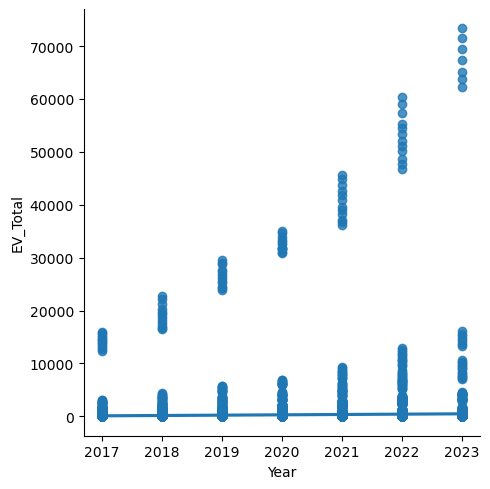

In [22]:
#Name electric scatterplot
Scatter_Electric = sns.lmplot(x = 'Year', y = 'EV_Total', data = df_cars)

In [23]:
#Export Electric Scatterplot
Scatter_Electric.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatter_Electric.png'))

    5. Pair Plots
    (Create a pair plot of the entire data set.)

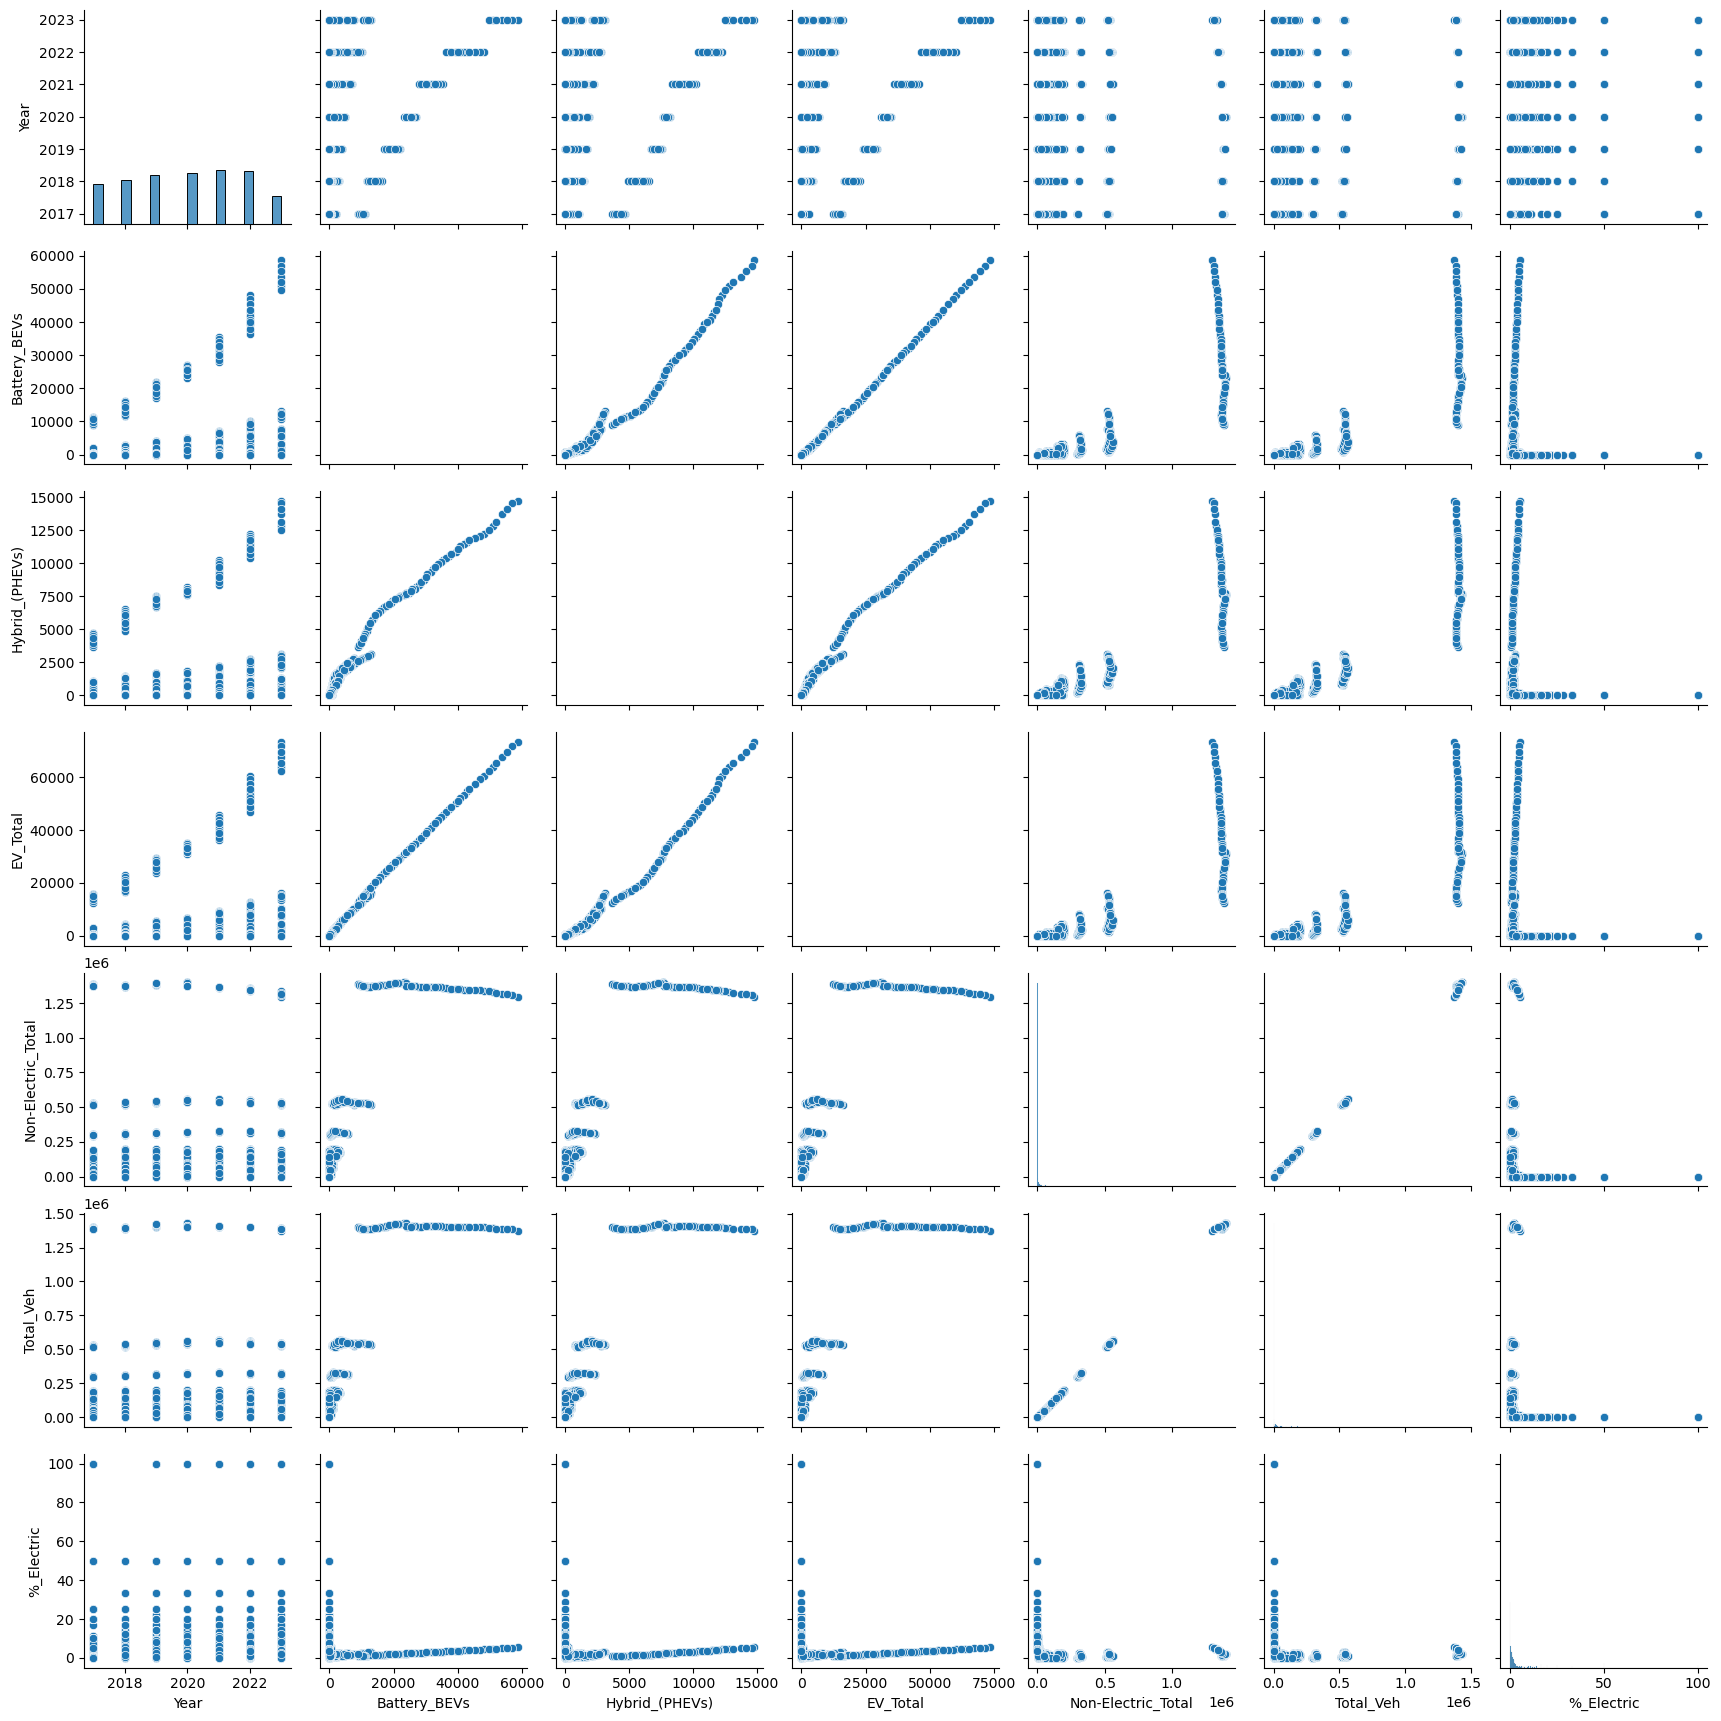

In [24]:
#Create a pair plot of the entire data set
pair_plot = sns.pairplot(df_cars)

In [25]:
#Export pair plot
pair_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

This was fascinating to look at, but again, probably not the best dataset for looking at ordinal/quantitative correlations.  The categorical correlations are probably where the meat is on this bone.

    6. Categorical Plots
    (Create a categorical plot and interpret the results.)

<Axes: xlabel='State', ylabel='Count'>

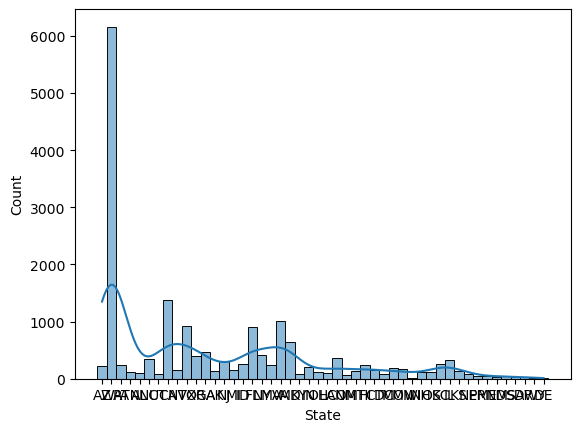

In [5]:
#Look at histoplot of States, although I don't anticipate being able to use this due to the number of states
sns.histplot(df_cars['State'], bins =20, kde = True)

As expected, there are too many states to discern which state is which.  Will do a value counts, but will create categories of states based on proximity to WA state where the vehicles are being registered.

In [7]:
#Create a table of the count of registrations per state from 2017-2023 (there may be more than one registration in a count,
#this will display the number of times any vehicle is registered where the owner resides in that location)
df_cars['State'].value_counts(dropna = False)

WA    6162
CA    1381
VA    1008
TX     931
FL     909
MD     647
GA     468
NY     412
OR     401
CO     368
NC     345
IL     332
NJ     313
ID     259
SC     249
HI     248
MA     237
PA     235
AZ     222
IN     203
MO     186
MN     164
NV     161
CT     158
MI     145
AK     140
KS     133
MT     133
OK     124
OH     116
NH     115
TN     112
AL     105
LA     100
KY      86
NE      83
DC      79
UT      78
NM      59
MS      49
ME      48
PR      46
AR      36
ND      34
SD      24
WI      19
WY      14
DE       9
Name: State, dtype: int64

In [8]:
#Create regions by proximity to WA State
regions = {
    'WA' : 'Washington',
    'AK' : 'Nearest',
    'HI' : 'Nearest',
    'OR' : 'Nearest',
    'CA' : 'Nearest',
    'ID' : 'Nearest',
    'NV' : 'Nearest',
    'UT' : 'Nearest',
    'AZ' : 'Nearest',
    'WY' : 'Nearest',
    'MT' : 'Nearest',
    'ND' : 'Mid-Distance',
    'SD' : 'Mid-Distance',
    'NB' : 'Mid-Distance',
    'TX' : 'Mid-Distance',
    'CO' : 'Mid-Distance',
    'NM' : 'Mid-Distance',
    'LA' : 'Mid-Distance',
    'MN' : 'Mid-Distance',
    'WI' : 'Mid-Distance',
    'KS' : 'Mid-Distance',
    'IL' : 'Mid-Distance',
    'OK' : 'Mid-Distance',
    'NE' : 'Mid-Distance',
    'PR' : 'Mid-Distance',
    'MS' : 'Mid-Distance',
    'PA' : 'Furthest',
    'TN' : 'Furthest',
    'AL' : 'Furthest',
    'NC' : 'Furthest',
    'GA' : 'Furthest',
    'NJ' : 'Furthest',
    'MI' : 'Furthest',
    'FL' : 'Furthest',
    'NY' : 'Furthest',
    'MA' : 'Furthest',
    'VA' : 'Furthest',
    'MD' : 'Furthest',
    'KY' : 'Furthest',
    'IN' : 'Furthest',
    'OH' : 'Furthest',
    'CT' : 'Furthest',
    'DC' : 'Furthest',
    'MO' : 'Furthest',
    'NH' : 'Furthest',
    'SC' : 'Furthest',
    'ME' : 'Furthest',
    'AR' : 'Mid-Distance',
    'DE' : 'Furthest',
}

In [9]:
#Add Proximity column to df
def Proximity(state):
    return regions[state]

df_cars['Proximity'] = df_cars['State'].apply(Proximity)

In [10]:
df_cars.head(10)

,Month_ending,Year,County,State,Primary_use,Battery_BEVs,Hybrid_(PHEVs),EV_Total,Non-Electric_Total,Total_Veh,%_Electric,Proximity
0,April,2017,Pinal,AZ,Passenger,2,0,2,254,256,0.78,Nearest
1,April,2017,Island,WA,Passenger,108,128,236,59768,60004,0.39,Washington
2,April,2017,Clark,WA,Truck,0,0,0,77561,77561,0.00,Washington
3,April,2017,Allegheny,PA,Passenger,1,0,1,93,94,1.06,Furthest
4,April,2017,Shelby,TN,Passenger,0,1,1,109,110,0.91,Furthest
5,April,2017,Dale,AL,Passenger,0,1,1,65,66,1.52,Furthest
6,April,2017,Jefferson,WA,Passenger,98,56,154,23744,23898,0.64,Washington
8,April,2017,Harnett,NC,Passenger,1,0,1,257,258,0.39,Furthest
9,April,2017,Salt Lake,UT,Passenger,0,1,1,289,290,0.34,Nearest
10,April,2017,Yakima,WA,Truck,0,0,0,57219,57219,0.00,Washington


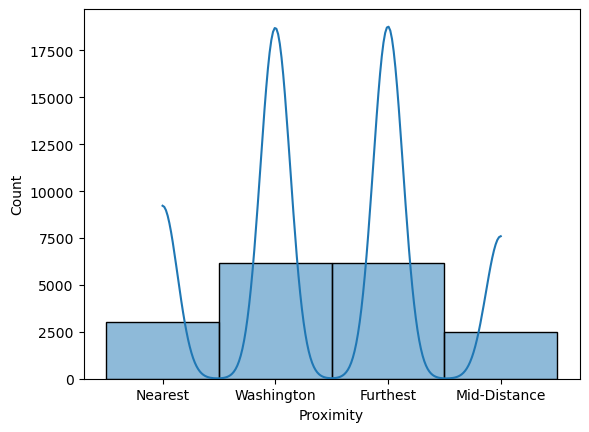

In [12]:
#Look at distribution of proximity
histplot1 = sns.histplot(df_cars['Proximity'], bins = 20, kde = True)

In [13]:
#Export histplot
histplot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histplot.png'))

This is interesting that states the furthest away have just as many registrations as those who reside in WA State.  I am going to plot electric vs non-electric vehicles by year and proximity to see how this may have changed over the years.

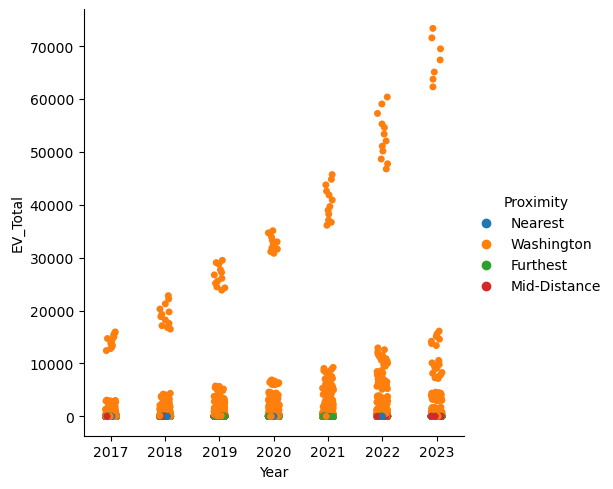

In [14]:
#plot Electric Vehicles by year & proximity
EV_cat_plot = sns.catplot(x='Year', y='EV_Total', hue='Proximity', data=df_cars)

In [15]:
#Export graph
EV_cat_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'EV_Yearly.png'))

Its hard to see the breakout of proximmity at the bottom with all the WA state vehicles; potentially could see more detail in creating a subset hiding WA and looking at registrations that way.  Can clearly see the growth of electric vehicle registrations.  Will look at non-electric vehicles to see if there is a similar growth.

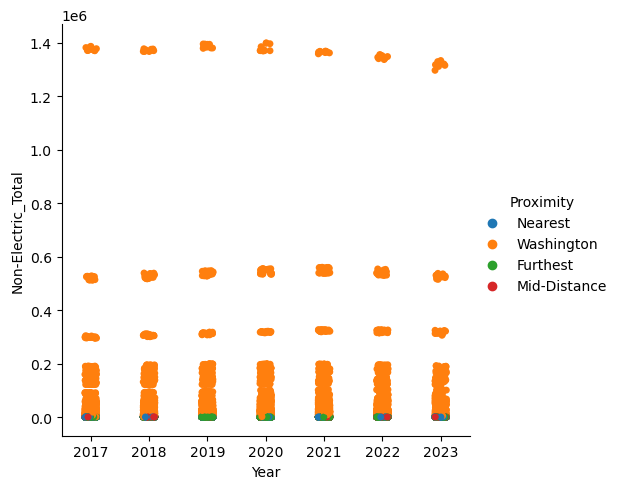

In [16]:
#plot Non-Electric Vehicles by year & proximity
NonEV_cat_plot = sns.catplot(x='Year', y='Non-Electric_Total', hue='Proximity', data=df_cars)

In [17]:
#Export graph
NonEV_cat_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'NonEV_Yearly.png'))

There is actually a decline in the overal non-electric totals.  Again, I would like to peruse this without WA registrations.  I am also going to look at passenger vs truck category.

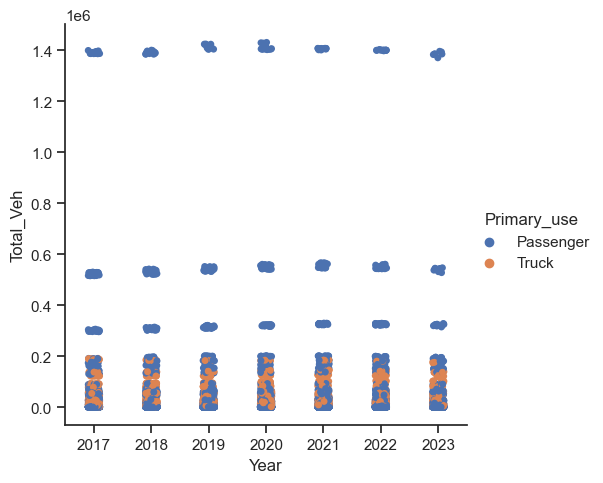

In [19]:
#Look at Primary use
sns.set(style='ticks')
Use_cat_plot=sns.catplot(x='Year', y='Total_Veh', hue='Primary_use', data=df_cars)

In [20]:
#Export graph
Use_cat_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Use_Yearly.png'))

7. Revisit the questions previously generated and write answers to those you can based on the exploration.  Add any new questions.
	What counties in Washington State have seen the greatest growth in the percentage of electric vehicles?
	Is there an increase in the number of trucks vs passenger vehicles?
	How have alternative fueling locations grown proportionately to EV registrations?
	What is the distance between registered vehicles and owners registered address?	

None of these questions were answered by this first analysis, as they are geogrphically related questions, which is coming in later explorations.  

    8.  Define any hypotheses that you can at this point.

As electric vehicle registrations increase, non-electric vehicle registrations will decrease as they are being replaced and not additional registrations.

Registrations in Washington from owners who reside in the states furthest away from Washington State contribute to the highest number of registered vehicles year over year.

In [22]:
#Export the dataframe with new column.
df_cars.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cars_explored.csv'))